In [1]:
# Importing necessery libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing necessary libraries
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
# loading the dataset
df = pd.read_csv('Crop_recommendation.csv')
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
# Statistical Analysis of Data
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
# Check count of missing values
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

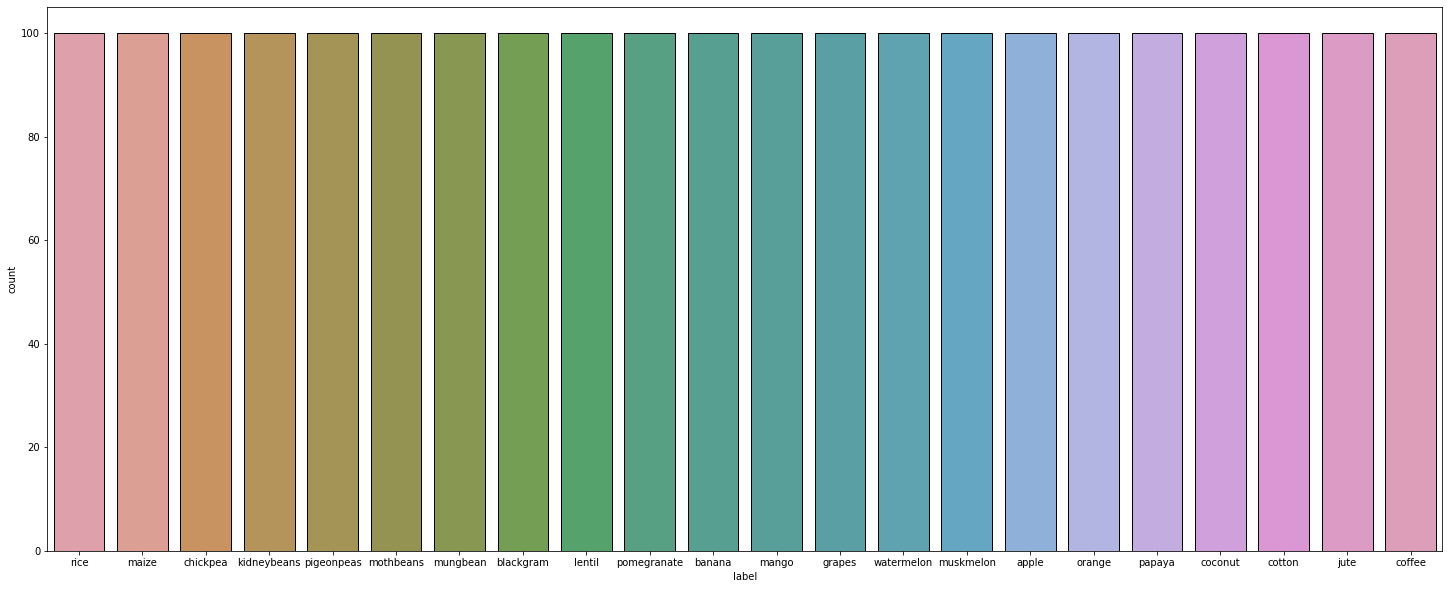

In [7]:
# Visualize the categorical data #1: Attrition_Flag
plt.figure(figsize = (25,10))
sns.countplot(x = df['label'], edgecolor = 'black', saturation = 0.55)
plt.show()

In [8]:
#k-nearest neighbors function
def KNNClassifier(X_train, X_test, y_train, y_test):
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)
    train_score = classifier.score(X_train, y_train)
    test_score = classifier.score(X_test, y_test)

    k_list = range(1, 101)
    accuracies = []
    for k in k_list:
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(X_train, y_train)
        accuracies.append(classifier.score(X_test, y_test))

    plt.figure(figsize=(10, 10))
    plt.plot(k_list, accuracies)
    plt.xlabel("k")
    plt.ylabel("Validation Accuracy")
    plt.title("Classifier Accuracy")
    plt.show()

    return train_score, test_score

In [9]:
#decision tree function
def DTClassifier(X_train, X_test, y_train, y_test):
    classifier = DecisionTreeClassifier(max_depth=7, random_state=1)
    classifier.fit(X_train, y_train)

    train_score = classifier.score(X_train, y_train)
    test_score = classifier.score(X_test, y_test)

    k_list = range(1, 101)
    accuracies = []
    for k in k_list:
        classifier = DecisionTreeClassifier(max_depth=100)
        classifier.fit(X_train, y_train)
        accuracies.append(classifier.score(X_test, y_test))

    plt.figure(figsize=(10, 10))
    plt.plot(k_list, accuracies)
    plt.xlabel("k")
    plt.ylabel("Validation Accuracy")
    plt.title("Classifier Accuracy")
    plt.show()

    return train_score, test_score

In [10]:
X = df.drop('label', axis=1)
y = df['label']

In [11]:
# Split dataset by 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

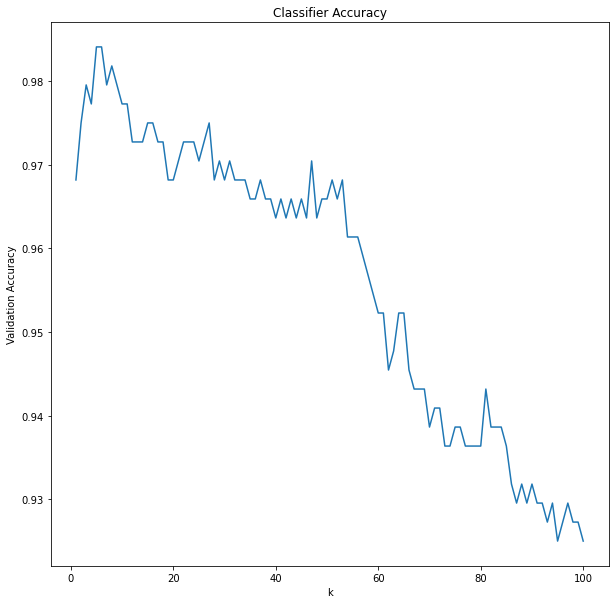

In [12]:
# Classifying by K-Nearest Neighbors
train_score, test_score = KNNClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())

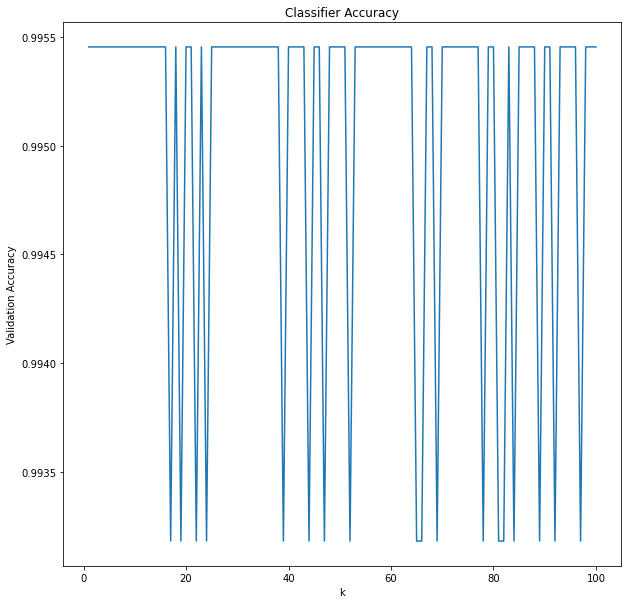

In [13]:
# Classifying by DecisionTree :
train_score, test_score = DTClassifier(X_train, X_test, y_train.values.ravel(), y_test.values.ravel())